## Practice with Libraries

### 0. Import libraries

In [1]:
if(!require(tidyverse)) {
    install.packages("tidyverse")
    library(tidyverse)
}

if(!require(lubridate)) {
    install.packages("lubridate")
    library(lubridate)
}

Loading required package: tidyverse

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘tidyverse’”
Installing package into ‘/home/xteca/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xfun’, ‘rematch’, ‘processx’, ‘tinytex’, ‘jquerylib’, ‘blob’, ‘DBI’, ‘gargle’, ‘cellranger’, ‘ids’, ‘progress’, ‘callr’, ‘rmarkdown’, ‘selectr’, ‘broom’, ‘dbplyr’, ‘dtplyr’, ‘googledrive’, ‘googlesheets4’, ‘haven’, ‘modelr’, ‘readxl’, ‘reprex’, ‘rvest’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lubridate


Attachi

### 1. Datetime Data Class

In [2]:
date <- as.Date(c('2021-01-31', '2021-02-28', '2021-03-31'))
date

[1] "2021-01-31" "2021-02-28" "2021-03-31"

In [3]:
date <- as.Date(c('21/01/31', '21/02/28', '21/03/31'), format='%y/%m/%d')
date

[1] "2021-01-31" "2021-02-28" "2021-03-31"

In [4]:
unclass(date)

[1] 18658 18686 18717

In [5]:
# From Lubridate
date %>% year

[1] 2021 2021 2021

In [6]:
# From Lubridate
date %>% month

[1] 1 2 3

In [7]:
y <- date[1] %>% year

In [8]:
y

[1] 2021

In [9]:
approx <- c(31, 31+28, 31+28+31) %>% 
    `+`((y - 1970) * 365.25)
approx

[1] 18658.75 18686.75 18717.75

In [10]:
as.POSIXct('2021-01-31 12:34:56')

[1] "2021-01-31 12:34:56 KST"

In [11]:
unclass(as.POSIXct('2021-01-31 12:34:56'))

[1] 1612064096
attr(,"tzone")
[1] ""

In [12]:
as.POSIXlt('2021-01-31 12:34:56')

[1] "2021-01-31 12:34:56 KST"

In [13]:
unclass(as.POSIXlt('2021-01-31 12:34:56'))

$sec
[1] 56

$min
[1] 34

$hour
[1] 12

$mday
[1] 31

$mon
[1] 0

$year
[1] 121

$wday
[1] 0

$yday
[1] 30

$isdst
[1] 0

$zone
[1] "KST"

$gmtoff
[1] NA

### 2. ts

In [14]:
ts(1:10, frequency = 4, start = c(1959,2))

,Qtr1,Qtr2,Qtr3,Qtr4
1959,,1,2,3
1960,4,5,6,7
1961,8,9,10,


In [15]:
ts(1:10, frequency=12, start=c(2020,1))

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct
2020,1,2,3,4,5,6,7,8,9,10


In [16]:
ts(1:10, start=2000)

A Time Series:
 [1]  1  2  3  4  5  6  7  8  9 10

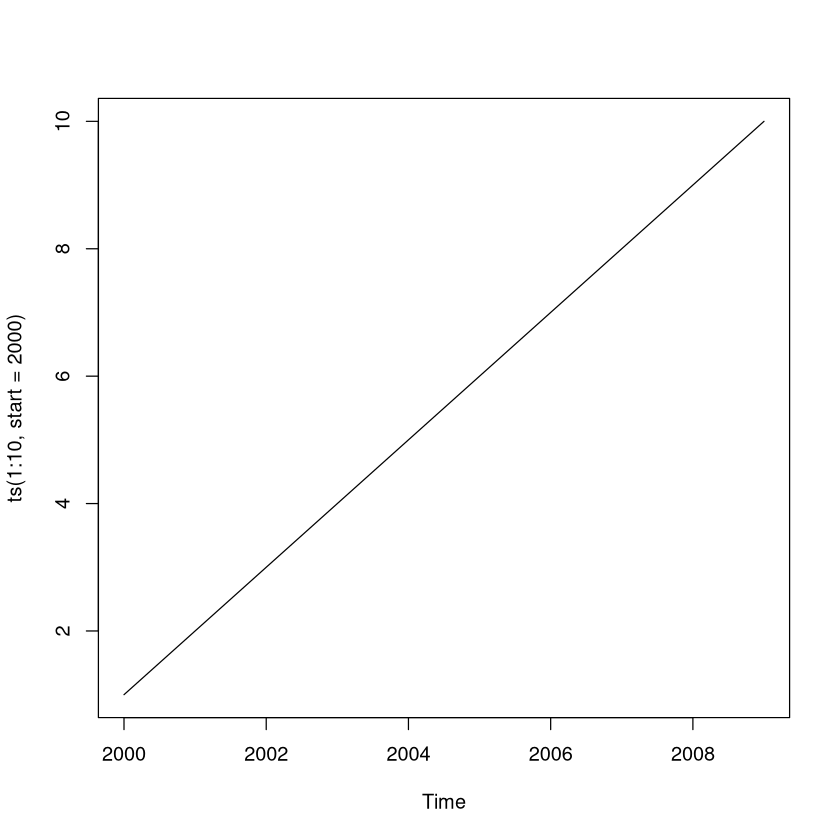

In [17]:
plot(ts(1:10, start=2000))

### 3. tsibble

In [18]:
if(!require(tsibble)) {
    install.packages('tsibble')
    library(tsibble)
}

Loading required package: tsibble


Attaching package: ‘tsibble’


The following object is masked from ‘package:lubridate’:

    interval


The following objects are masked from ‘package:base’:

    intersect, setdiff, union




In [19]:
set.seed(42)

x <- data.frame(
    date = as.Date('2008-01-01') + 0:9,
    id = 1:10,
    x1 = rnorm(10),
    x2 = rep('a', 10)
)

x

date,id,x1,x2
<date>,<int>,<dbl>,<chr>
2008-01-01,1,1.37095845,a
2008-01-02,2,-0.56469817,a
2008-01-03,3,0.36312841,a
2008-01-04,4,0.63286260,a
2008-01-05,5,0.40426832,a
2008-01-06,6,-0.10612452,a
2008-01-07,7,1.51152200,a
2008-01-08,8,-0.09465904,a
2008-01-09,9,2.01842371,a


In [20]:
y <- as_tsibble(x, key = id, index = date)
y

date,id,x1,x2
<date>,<int>,<dbl>,<chr>
2008-01-01,1,1.37095845,a
2008-01-02,2,-0.56469817,a
2008-01-03,3,0.36312841,a
2008-01-04,4,0.63286260,a
2008-01-05,5,0.40426832,a
2008-01-06,6,-0.10612452,a
2008-01-07,7,1.51152200,a
2008-01-08,8,-0.09465904,a
2008-01-09,9,2.01842371,a


## Exercise with COVID-19

In [31]:
covid19 <- read.csv(
    './data/COVID19.csv', 
    header = TRUE, 
    na = '-', 
    strip.white = TRUE, 
    stringsAsFactors = TRUE
)
colnames(covid19) <- c('category', 'status', 'date', 'value')
covid19 <- covid19[, c(3, 1, 2, 4)]
covid19

date,category,status,value
<fct>,<fct>,<fct>,<int>
2020. 04. 09,전체,신규,39
2020. 04. 10,전체,신규,27
2020. 04. 11,전체,신규,30
2020. 04. 12,전체,신규,32
2020. 04. 13,전체,신규,25
2020. 04. 14,전체,신규,27
2020. 04. 15,전체,신규,27
2020. 04. 16,전체,신규,22
2020. 04. 17,전체,신규,22


In [32]:
covid19$date <- as.Date(covid19$date, "%Y. %m. %d")
covid19

date,category,status,value
<date>,<fct>,<fct>,<int>
2020-04-09,전체,신규,39
2020-04-10,전체,신규,27
2020-04-11,전체,신규,30
2020-04-12,전체,신규,32
2020-04-13,전체,신규,25
2020-04-14,전체,신규,27
2020-04-15,전체,신규,27
2020-04-16,전체,신규,22
2020-04-17,전체,신규,22


In [33]:
covid19 <- covid19 %>%
    filter(grepl("세", category)) %>%
    filter(category != "세종")
covid19$value <- ifelse(is.na(covid19$value), 0, covid19$value)
covid19

date,category,status,value
<date>,<fct>,<fct>,<dbl>
2020-04-09,0-9세,신규,2
2020-04-10,0-9세,신규,1
2020-04-11,0-9세,신규,1
2020-04-12,0-9세,신규,0
2020-04-13,0-9세,신규,2
2020-04-14,0-9세,신규,0
2020-04-15,0-9세,신규,0
2020-04-16,0-9세,신규,3
2020-04-17,0-9세,신규,1


In [34]:
covid19 <- tidyr::spread(covid19, category, value)
covid19

date,status,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,60-69세,70-79세,80세 이상
<date>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-04-09,신규,2,4,12,7,7,2,2,0,3
2020-04-10,신규,1,1,7,4,2,3,6,2,1
2020-04-11,신규,1,5,5,2,3,6,7,0,1
2020-04-12,신규,0,3,13,5,1,4,3,3,0
2020-04-13,신규,2,1,10,2,1,2,5,1,1
2020-04-14,신규,0,3,7,4,4,3,3,2,1
2020-04-15,신규,0,4,9,5,3,2,1,2,1
2020-04-16,신규,3,3,5,1,2,3,2,1,2
2020-04-17,신규,1,4,9,3,1,2,1,1,0


In [35]:
covid19.ts <- ts(covid19[, 2:10], frequency = 365)
covid19.tsibble <- as_tsibble(covid19, index=date)

In [36]:
covid19.ts

,status,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,60-69세,70-79세
1.000000,1,2,4,12,7,7,2,2,0
1.002740,1,1,1,7,4,2,3,6,2
1.005479,1,1,5,5,2,3,6,7,0
1.008219,1,0,3,13,5,1,4,3,3
1.010959,1,2,1,10,2,1,2,5,1
1.013699,1,0,3,7,4,4,3,3,2
1.016438,1,0,4,9,5,3,2,1,2
1.019178,1,3,3,5,1,2,3,2,1
1.021918,1,1,4,9,3,1,2,1,1
1.024658,1,2,0,9,1,1,2,1,1


In [37]:
covid19.tsibble

date,status,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,60-69세,70-79세,80세 이상
<date>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-04-09,신규,2,4,12,7,7,2,2,0,3
2020-04-10,신규,1,1,7,4,2,3,6,2,1
2020-04-11,신규,1,5,5,2,3,6,7,0,1
2020-04-12,신규,0,3,13,5,1,4,3,3,0
2020-04-13,신규,2,1,10,2,1,2,5,1,1
2020-04-14,신규,0,3,7,4,4,3,3,2,1
2020-04-15,신규,0,4,9,5,3,2,1,2,1
2020-04-16,신규,3,3,5,1,2,3,2,1,2
2020-04-17,신규,1,4,9,3,1,2,1,1,0


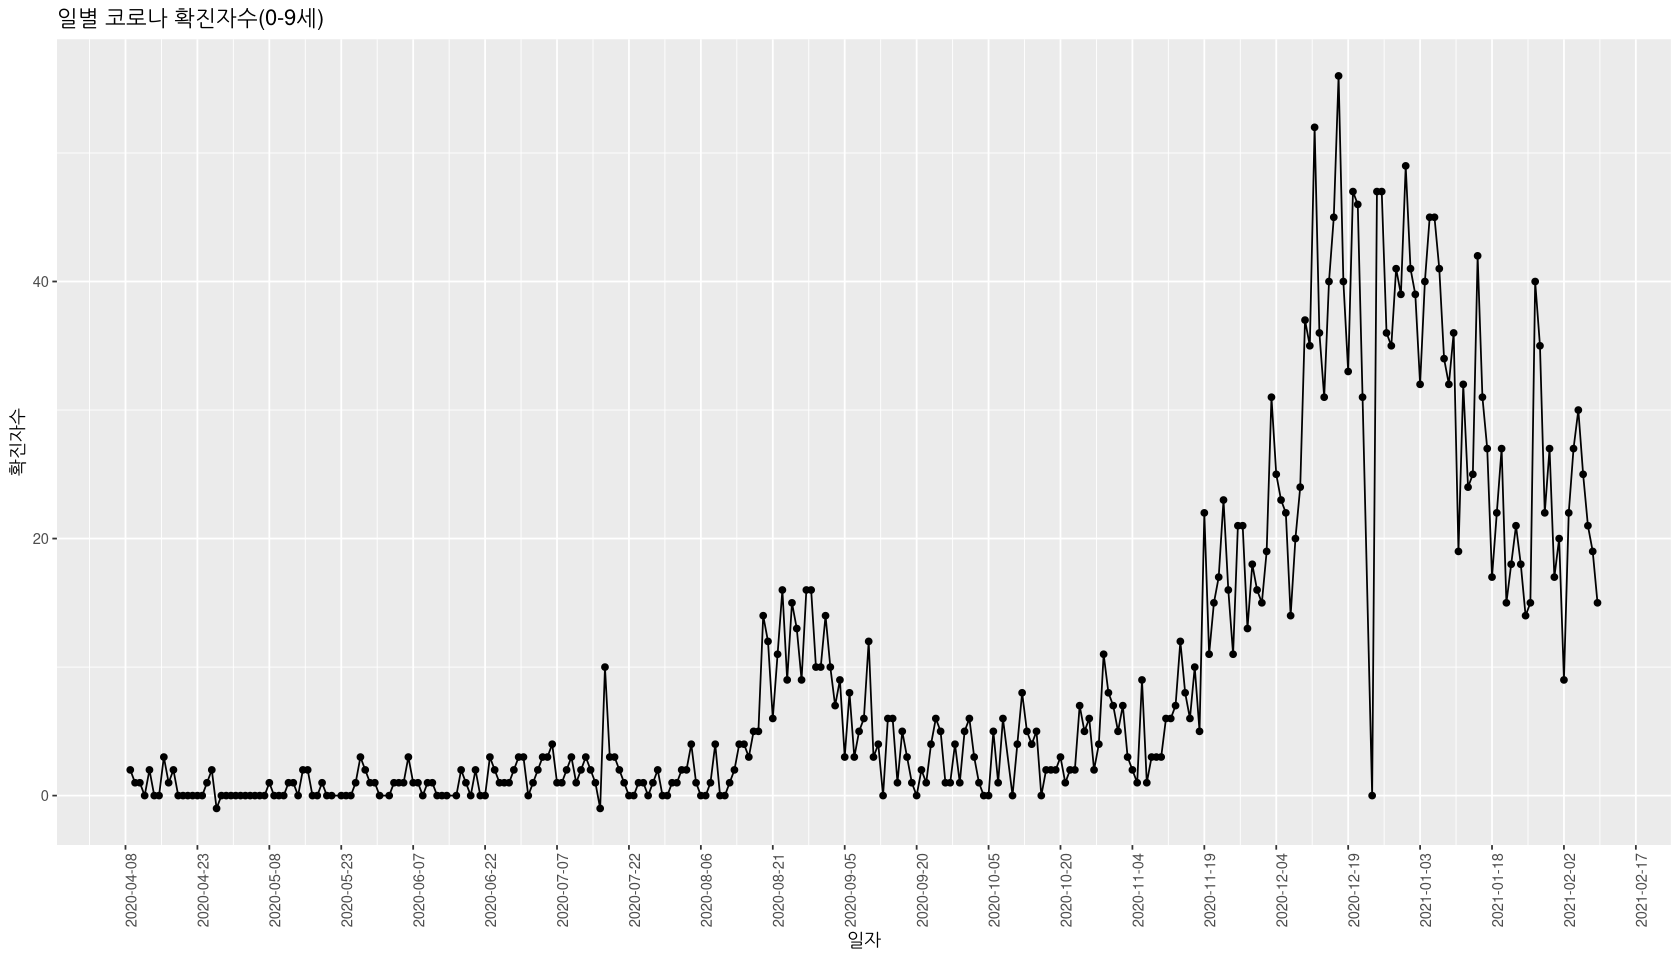

In [43]:
options(repr.plot.width = 14, repr.plot.height = 8)
ggplot(data = covid19, aes(x = date, y = `0-9세`)) +
    geom_line(aes(group = 1)) +
    geom_point(shape = 'circle') +
    labs(title = '일별 코로나 확진자수(0-9세)', x = '일자', y = '확진자수') +
    scale_y_continuous(labels = scales::number_format(big.mark = ',')) +
    scale_x_date(breaks = '15 day') +
    theme(axis.text.x = element_text(angle=90, hjust=1))